<a href="https://colab.research.google.com/github/avinashmane/ainvest/blob/master/Tian_in_R%2C_Matlab%2C_VBA%2C_C%2B%2B%2C_Python_with_out_Greeks_and_Options_on_Options_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tian (1993) Binomial Lattice Valuation Framework
Video Explanation:

https://youtu.be/UVBAZ1jS33g

See Shang and Byrne (2020) for evaluating performance of varying lattices

https://arrow.tudublin.ie/cgi/viewcontent.cgi?article=1046&context=buschmanart

See Joshi (2007) for some discussion of varying lattices

https://cutt.ly/xm8mrOI


# New Section

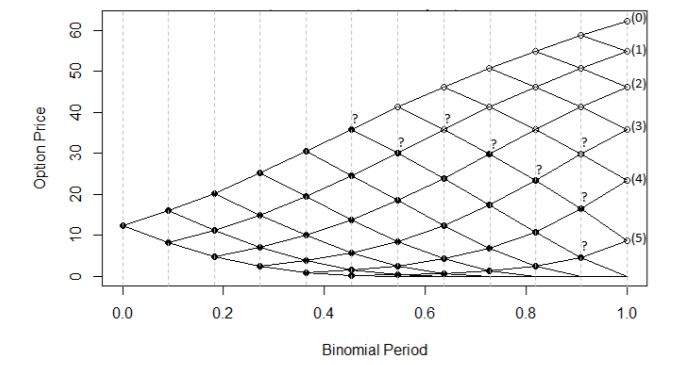

#Tian Binomial Lattice for Option Pricing
Cox, Ross, Rubinstein (1979, CRR) are most associated with the development of the binomial model framwork for pricing options and there lattice framework is probably the most frequently used in classrooms - in part because it extends naturally from Black Scholes and CRR simplified approach was more intuitively appealing.
In applying the their numerical approach CRR noted that higher accuracy could be achieved by incorporating a larger number of time steps to trees. Broadie and Detemple (1996) obtained the “true” value of American options by elaborating a 15,000-step benchmark binomial model for CRR. Using probabilistic methods, Amin and Khanna (1994) proved that the discrete-time models converge to the corresponding continuous-time models. This is important,as it provides a roadmap for establishing benchmarks. A number of variants of the original CRR trees have been proposed. Leisen and Reimer (1996, LR) and Tian (1993, Tian) reconstructed the CRR binomial model by modifying the effect of parameters on jumps between nodes and probabilities.
Tian (1993) proposed that the
binomial parameters is selected such that discrete-time distribution converges to the continuous-time
distribution. Tian (1993) stipulated that p, q, u, and d are defined as:

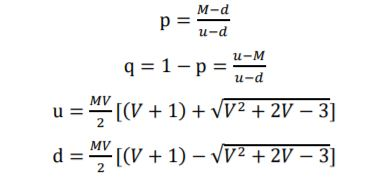

where M = exp(rΔt) and V = exp(σ2Δt). Other than the varying definition of u, d and p, the stock price tree adheres to the same construction. Likewise, the backward induction method relevant for Tian model is performed in the usual fashion, not unlike, the conventional CRR binomial tree. Each node in the binomial tree can be identified as having a (i, j) mapping, where i represents the ith column in which the node is located and j represents the number of upward movements of stock price consistent with each node. The maximum j is determined by the ith column count. The option value of node (i, j)
is represented as V(i, j). Since the Tian binomial tree uses a backward inductive pricing process, the pricing starts from the nodes at the maturity. Shang and Byrne (2020)

https://onlinelibrary.wiley.com/doi/abs/10.1002/fut.22178

found that the Tian model could be adapted to vastly improve estimation performance for Americn options.


#R Function for Tian

#Enable R code in Google Colab
Video Explanation

https://youtu.be/UVBAZ1jS33g

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
# This code is taken from foptions
# https://rdrr.io/rforge/fOptions/src/R/BinomialTreeOptions.R
# might check results later

TIANBinomialTreeOption <- function(TypeFlag, S, X, Time, r, b, sigma, n)
{   # A function implemented by Diethelm Wuertz

    # Description:
    #   Tian's Modification to the Binomial Tree Option

    # FUNCTION:

    # Check Flags:
    TypeFlag = TypeFlag[1]
    if (TypeFlag == "ce" || TypeFlag == "ca") z = +1
    if (TypeFlag == "pe" || TypeFlag == "pa") z = -1

    # Parameters:
    dt = Time/n
    M = exp ( b*dt )
    V = exp ( sigma^2 * dt )
    u = (M*V/2) * ( V + 1 + sqrt(V*V + 2*V - 3) )
    d = (M*V/2) * ( V + 1 - sqrt(V*V + 2*V - 3) )
    p = (M-d)/(u-d)
    Df = exp(-r*dt)

    # Iteration:
    OptionValue = z*(S*u^(0:n)*d^(n:0) - X)
    OptionValue = (abs(OptionValue) + OptionValue) / 2

    # European Option:
    if (TypeFlag == "ce" || TypeFlag == "pe") {
        for ( j in seq(from = n-1, to = 0, by = -1) )
            for ( i in 0:j )
                OptionValue[i+1] =
                (p*OptionValue[i+2] + (1-p)*OptionValue[i+1]) * Df }

    # American Option:
    if (TypeFlag == "ca" || TypeFlag == "pa") {
        for ( j in seq(from = n-1, to = 0, by = -1) )
            for ( i in 0:j )
                OptionValue[i+1] = max((z * (S*u^i*d^(abs(i-j)) - X)),
                    (p*OptionValue[i+2] + (1-p)*OptionValue[i+1]) * Df) }

    # Return Value:
    OptionValue[1]

}


TIANBinomialTreeOption("ca", 100, 100, 3, 0.03, -0.04, 0.2, 500)

[1] 9.063848


#Matlab code for Binomial Tree based on Tian (1993)

https://www.goddardconsulting.ca/matlab-binomial-tian.html

Video Explanation

https://youtu.be/56k9sfxMLk4

In [ ]:
!apt install octave

Reading package lists... Done
Building dependency tree       
Reading state information... Done
octave is already the newest version (4.2.2-1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [ ]:
%%writefile tian.m
%function oPrice = binPriceTian(X,S0,r,sig,dt,steps,oType,earlyExercise)
% Function to calculate the price of a vanilla European or American
% Put or Call option using a Tian binomial tree.
%
% Inputs: X - strike
%       : S0 - stock price
%       : r - risk free interest rate
%       : sig - volatility
%       : dt - size of time steps
%       : steps - number of time steps to calculate
%       : oType - must be 'PUT' or 'CALL'.
%       : earlyExercise - true for American, false for European.
%
% Output: oPrice - the option price
%
% Notes: This code focuses on details of the implementation of the Tian
%        algorithm.
%        It does not contain any programatic essentials such as error
%        checking.
%        It does not allow for optional/default input arguments.
%        It is not optimized for memory efficiency or speed.

% Author: Phil Goddard (phil@goddardconsulting.ca)
% Date  : Q4, 2007

% Calculate the Tian model parameters

X = 100
S0 = 100
r =0.03
sig = 0.2
T = 3
steps = 500
oType ='CALL' % or 'PUT'.
earlyExercise = true %for American, false for European.
dt = T/steps
q = 0.07

nu = exp(sig*sig*dt);
a = exp((r-q)*dt);
u = 0.5*a*nu*(nu+1+sqrt(nu*nu+2*nu-3));
d = 0.5*a*nu*(nu+1-sqrt(nu*nu+2*nu-3));
p = (a-d)/(u-d);

% Loop over each node and calculate the Tian underlying price tree
priceTree = nan(steps+1,steps+1);
priceTree(1,1) = S0;
for idx = 2:steps+1
    priceTree(1:idx-1,idx) = priceTree(1:idx-1,idx-1)*u;
    priceTree(idx,idx) = priceTree(idx-1,idx-1)*d;
end

% Calculate the value at expiry
valueTree = nan(size(priceTree));
switch oType
    case 'PUT'
        valueTree(:,end) = max(X-priceTree(:,end),0);
    case 'CALL'
        valueTree(:,end) = max(priceTree(:,end)-X,0);
end

% Loop backwards to get values at the earlier times
steps = size(priceTree,2)-1;
for idx = steps:-1:1
    valueTree(1:idx,idx) = ...
        exp(-r*dt)*(p*valueTree(1:idx,idx+1) ...
        + (1-p)*valueTree(2:idx+1,idx+1));
    if earlyExercise
        switch oType
            case 'PUT'
                valueTree(1:idx,idx) = ...
                    max(X-priceTree(1:idx,idx),valueTree(1:idx,idx));
            case 'CALL'
                valueTree(1:idx,idx) = ...
                    max(priceTree(1:idx,idx)-X,valueTree(1:idx,idx));
        end
    end
end

% Output the option price
oPrice = valueTree(1);

oPrice

Overwriting tian.m


In [ ]:
# -W : no window system
!octave -W tian.m

X =  100
S0 =  100
r =  0.030000
sig =  0.20000
T =  3
steps =  500
oType = CALL
earlyExercise = 1
dt =  0.0060000
q =  0.070000
oPrice =  9.0638


#Numpy for Tian (1993) Binomial Option tree Valuation
NumPy is a key pillar to scientific Python. This library furnishes a specific data structure for high-performance numerical computing: the multidimensional array. Binomial option pricing applies large scale multi-array estimation. Python can otherwise be sluggish thus the rationale behind NumPy is the following: Python being a high-level dynamic language, it is intuitive and simple to use but slower than a low-level language such as C or C++. NumPy implements the multidimensional array structure in C and provides a convenient Python interface, thus bringing together high performance and ease of use -enabling fast and convenient scientific estimation.

Video Explanation

https://youtu.be/KoUAMOTasxU

In [ ]:
# https://sites.google.com/view/vinegarhill-financelabs/binomial-lattice-framework/numpy
# https://github.com/cantaro86/Financial-Models-Numerical-Methods/blob/master/2.3%20American%20Options.ipynb

In [ ]:
S0=100          # spot stock price
K=100.0           # strike
T=3             # maturity
r=0.03            # risk free rate
sig=0.2           # diffusion coefficient or volatility
div=0.07          # I introduce div here
payoff = "call"    # payoff
N = 500         # number of periods or number of time steps

In [ ]:
import numpy as np

In [ ]:
dT = T / N
M = np.exp((r-div) * dT) #we replace r in Tian 93 by b since q is taken into consideration
H = np.exp(sig * sig * dT)
u = M * H / 2 * ((H + 1) + np.sqrt(H * H + 2 * H - 3))
d = M * H / 2 * ((H + 1) - np.sqrt(H * H + 2 * H - 3))
p = (M - d) / (u - d)

In [ ]:
V = np.zeros(N+1)                             # initialize the price vector
S_T = np.array( [(S0 * u**j * d**(N - j)) for j in range(N + 1)] )  # price S_T at time T

if payoff =="call":
    V[:] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:] = np.maximum(K-S_T, 0.0)

# Follows C++
for i in range(N-1, -1, -1):
    V[:-1] = np.exp(-r*dT) * (p * V[1:] + (1 - p) * V[:-1])    # the price vector is overwritten at each step
    S_T = S_T * (1/d)                                    # perhaps S_T * (1/d)
    if payoff=="call":
        V = np.maximum( V, S_T-K )
    elif payoff=="put":
        V = np.maximum( V, K-S_T )

print("American BS Tree Price: ", V[0])

American BS Tree Price:  9.063847611285421


#VBA Code for Tian (1993)
The VBA code below is non executable in Colab. You need to set code up in Excel Visual Basic Editor. Code template from Espen Haug

http://www.espenhaug.com/

and modified by Qianru Shang and Brian Byrne for Tian (1993) parameters.

Video Explanation:

https://youtu.be/KoUAMOTasxU

In [ ]:
Public Function Tian93(AmeEurFlag As String, CallPutFlag As String, S As Double, X As Double, T As Double, _
                r As Double, b As Double, V As Double, n As Integer) As Variant


    Dim OptionValue() As Double

    Dim u As Double, d As Double, P As Double
    Dim dt As Double, Df As Double, M As Double, H As Double  'replace V in Tian93 by H
    Dim i As Integer, j As Integer, z As Integer

    'Tian Parameters
    dt = T / n
    M = Exp(b * dt) '
    H = Exp(V * V * dt)
    u = M * H / 2 * ((H + 1) + Sqr(H * H + 2 * H - 3))
    d = M * H / 2 * ((H + 1) - Sqr(H * H + 2 * H - 3))
    P = (M - d) / (u - d)
    Df = Exp(-r * dt)


    ReDim OptionValue(0 To n)

    If CallPutFlag = "c" Then
        z = 1
        ElseIf CallPutFlag = "p" Then
        z = -1
    End If

    Df = Exp(-r * dt)
    For i = 0 To n
         OptionValue(i) = Application.Max(0, z * (S * u ^ i * d ^ (n - i) - X))
    Next

    For j = n - 1 To 0 Step -1
        For i = 0 To j
            If AmeEurFlag = "e" Then
                OptionValue(i) = (P * OptionValue(i + 1) + (1 - P) * OptionValue(i)) * Df
            ElseIf AmeEurFlag = "a" Then
                OptionValue(i) = Application.Max((z * (S * u ^ i * d ^ (j - i) - X)), _
                (P * OptionValue(i + 1) + (1 - P) * OptionValue(i)) * Df)
            End If

        Next

    Next

    Tian93 = OptionValue(0)

End Function

# C++ code for Tian (1993) model

Video Explanation:

https://youtu.be/l-VY8R5QFIs

also How to run C++ code in Google Colab painlessly

https://youtu.be/37Edun_FCk8

In [ ]:
%%writefile main.cpp
// Tian (1993) based on Fabrice Rouah and Espen Haug amended by Brian Byrne and Qianru Shang

#include <stdio.h>
#include <math.h>
#include <iostream>
#include <algorithm>
#include <iostream>
#include <vector>
#include<iomanip>
#include <string>

#include <time.h>

//using namespace System;
using namespace std;

// Function for binomial tree
double Binomial(int n, double S, double K, double r, double q, double v, double T, char PutCall, char OpStyle) {
	int i, j;

	double dt, u, d, p;
	// new for Tian
	double M, H;
	int z;

	// Quantities for the tree
	dt = T / n;

	M = exp((r-q)*dt);
	H = exp(v*v*dt);
	u = M*H / 2 * ((H + 1) + sqrt(H*H + 2 * H - 3));
	d = M*H / 2 * ((H + 1) - sqrt(H*H + 2 * H - 3));
	p = (M - d) / (u - d);

	if (PutCall == 'C')
	{
		z = 1;
	}
	else if (PutCall == 'P')
	{
		z = -1;
	}

	vector<double> OptionValue;

	//resize the column
	OptionValue.resize(n + 1);

	for (i = 0; i <= n; i++) {

	   OptionValue[i] = max(z*(S*pow(u, i)*pow(d, n - i) - K), 0.0);
	}

	// Backward recursion through the tree
	for (j = n - 1; j >= 0; j--)
		for (i = 0; i <= j; i++) {
			if (OpStyle == 'E')
				OptionValue[i] = exp(-r*dt)*(p*(OptionValue[i + 1]) + (1.0 - p)*(OptionValue[i]));
			else {

				OptionValue[i] = max(z*(S*pow(u, i)*pow(d, j - i) - K), exp(-r*dt)*(p*(OptionValue[i + 1]) + (1.0 - p)*(OptionValue[i])));
				//OptionValue[i] = max(z*(S*pow(u, (2 * i - j)) - K), exp(-r*dt)*(p*(OptionValue[i + 1]) + (1.0 - p)*(OptionValue[i])));
			}
		}
	// Return the option price
	return OptionValue[0];
}

int main() {
	//double S, K, T, v, r;
	//char PutCall, OpStyle;
	//int n;
	clock_t start_time, end_time;
	start_time = clock();


	int n = 500;							// Number of steps
	double S = 100.0;						// Spot Price
	double K = 100.0;						// Strike Price
	double T = 3;							// Years to maturity
	double r = 0.03;						// Risk Free Rate
	double q = 0.07;						//double q =
	double v = 0.20;
	char PutCall = 'C';
	char OpStyle = 'A';


    cout << setprecision(10);
	cout << "The binomial price is " << Binomial(n, S, K, r, q, v, T, PutCall, OpStyle) << endl;

	end_time = clock();
	cout << " " << start_time << " " << end_time << " " << (end_time - start_time) << endl;
	cout << " " << start_time << " " << end_time << " " << (end_time - start_time) / (double)CLOCKS_PER_SEC << " seconds" << endl;

	//system("PAUSE");
}


Writing main.cpp


In [ ]:
%%script bash

g++ main.cpp -std=c++11
./a.out

The binomial price is 9.063847611
 2464 25461 22997
 2464 25461 0.022997 seconds


#Tian (1993) With Greeks using Python

See Joshi (2007) for some discussion of varying lattices

https://cutt.ly/xm8mrOI

Video Explanation:

https://youtu.be/vWymipyS1gc


In [ ]:
# adapted from
# https://github.com/tienusss/Option_Calculations
# Import packages
import numpy as np


# Defined functions
def TianBinomial(OutputFlag, AmeEurFlag, CallPutFlag, S, X, T, r, c, v, n):
    # This functions calculates the implied volatility of American and European options
    # This code is based on "The complete guide to Option Pricing Formulas" by Espen Gaarder Haug (2007)
    # Translated from a VBA code
    # OutputFlag:
    # "P" Returns the options price
    # "d" Returns the options delta
    # "a" Returns an array containing the option value, delta and gamma
    # AmeEurFlag:
    # "a" Returns the American option value
    # "e" Returns the European option value
    # CallPutFlag:
    # "C" Returns the call value
    # "P" Returns the put value
    # S is the share price at time t
    # X is the strike price
    # T is the time to maturity in years (days/365)
    # r is the risk-free interest rate
    # c is the cost of carry rate
    # v is the volatility
    # n determines the stepsize


    # Creates a list with values from 0 up to n (which will be used to determine to exercise or not)
    n_list = np.arange(0, (n + 1), 1)

    # Checks if the input option is a put or a call, if not it returns an error
    if CallPutFlag == 'C':
        z = 1
    elif CallPutFlag == 'P':
        z = -1
    else:
        return 'Call or put not defined'


    # Calculates the stepsize in years
    dt = T / n

    # CRR parameter outputs
    # The up and down factors
    # u = np.exp(v*np.sqrt(dt))
    # d = 1./u
    # p = (np.exp((c)*dt)-d) / (u-d)

    # Tian Parameters outputs
    H = np.exp((v**2)*dt)
    u = 0.5 * np.exp(c * dt) * H * (H + 1 + np.sqrt(H**2 + 2*H -3))  # up movement
    d = 0.5 * np.exp(c * dt) * H * (H + 1 - np.sqrt(H**2 + 2*H -3))  # down movement
    p = (np.exp(c * dt) - d) / (u - d)

    df = np.exp(-r * dt)

    # Creates the most right column of the tree
    max_pay_off_list = []
    for i in n_list:
        i = i.astype('int')
        max_pay_off = np.maximum(0, z * (S * u ** i * d ** (n - i) - X))
        max_pay_off_list.append(max_pay_off)

    # The binominal tree
    for j in np.arange(n - 1, 0 - 1, -1):
        for i in np.arange(0, j + 1, 1):
            i = i.astype(int)  # Need to be converted to a integer
            if AmeEurFlag == 'e':
                max_pay_off_list[i] = (p * max_pay_off_list[i + 1] + (1 - p) * max_pay_off_list[i]) * df
            elif AmeEurFlag == 'a':
                max_pay_off_list[i] = np.maximum((z * (S * u ** i * d ** (j - i) - X)),
                                                 (p * max_pay_off_list[i + 1] + (1 - p) * max_pay_off_list[i]) * df)
        if j == 2:
            gamma = ((max_pay_off_list[2] - max_pay_off_list[1]) / (S * u ** 2 - S * u * d) - (
                    max_pay_off_list[1] - max_pay_off_list[0]) / (S * u * d - S * d ** 2)) / (
                            0.5 * (S * u ** 2 - S * d ** 2))
        if j == 1:
            delta = ((max_pay_off_list[1] - max_pay_off_list[0])) / (S * u - S * d)
    price = max_pay_off_list[0]

    # Put all the variables in the list
    variable_list = [delta, gamma, price]

    # Return values
    if OutputFlag == 'P':
        return price
    elif OutputFlag == 'd':
        return delta
    elif OutputFlag == 'g':
        return gamma
    elif OutputFlag == 'a':
        return variable_list
    else:
        return 'Indicate if you want to return P, d, g or a'

S = 100
X = 100
T = 3
r = 0.03
c = -0.04
v = 0.2
n = 500

Eur_call_result = TianBinomial('P', 'e', 'C', S, X, T, r, c, v, n)
American_call_result = TianBinomial('P', 'a', 'C', S, X, T, r, c, v, n)
Eur_put_result = TianBinomial('P', 'e', 'P', S, X, T, r, c, v, n)
American_put_result = TianBinomial('P', 'a', 'P', S, X, T, r, c, v, n)

#Print the output of the results
print('The price of the European call option is equal to ' +str(Eur_call_result))
print('The price of the American call option is equal to ' +str(American_call_result))
print('The price of the European put option is equal to ' +str(Eur_put_result))
print('The price of the American put option is equal to ' +str(American_put_result))



The price of the European call option is equal to 7.380181664356066
The price of the American call option is equal to 9.063847611284814
The price of the European put option is equal to 17.714875594462157
The price of the American put option is equal to 17.71862698968922


In [ ]:
Eur_call_result = TianBinomial('d', 'e', 'C', S, X, T, r, c, v, n)
American_call_result = TianBinomial('d', 'a', 'C', S, X, T, r, c, v, n)
Eur_put_result = TianBinomial('d', 'e', 'P', S, X, T, r, c, v, n)
American_put_result = TianBinomial('d', 'a', 'P', S, X, T, r, c, v, n)

#Print the output of the results
print('The delta of the European call option is equal to ' +str(Eur_call_result))
print('The delta of the American call option is equal to ' +str(American_call_result))
print('The delta of the European put option is equal to ' +str(Eur_put_result))
print('The delta of the American put option is equal to ' +str(American_put_result))

The delta of the European call option is equal to 0.34973245285445387
The delta of the American call option is equal to 0.46180211389715053
The delta of the European put option is equal to -0.4611923100025901
The delta of the American put option is equal to -0.4615234149385918


In [ ]:
Eur_call_result = TianBinomial('a', 'e', 'C', S, X, T, r, c, v, n)
American_call_result = TianBinomial('a', 'a', 'C', S, X, T, r, c, v, n)
Eur_put_result = TianBinomial('a', 'a', 'P', S, X, T, r, c, v, n)
American_put_result = TianBinomial('a', 'a', 'P', S, X, T, r, c, v, n)

#Print the output of the results
print('The Delta, Gamma and Price of the European call option are equal to ' +str(Eur_call_result))
print('The Delta, Gamma and Price of the American call option are equal to ' +str(American_call_result))
print('The Delta, Gamma and Price of the European put option are equal to ' +str(Eur_put_result))
print('The Delta, Gamma and Price of the American put option are equal to ' +str(American_put_result))

The Delta, Gamma and Price of the European call option are equal to [0.34973245285445387, 0.009216256864430741, 7.380181664356066]
The Delta, Gamma and Price of the American call option are equal to [0.46180211389715053, 0.014846253267417573, 9.063847611284814]
The Delta, Gamma and Price of the European put option are equal to [-0.4615234149385918, 0.00924646772963915, 17.71862698968922]
The Delta, Gamma and Price of the American put option are equal to [-0.4615234149385918, 0.00924646772963915, 17.71862698968922]


#C++ Code for Tian (1993) European Call, American Call, European Put and American Put

Video Explanation:

https://youtu.be/vWymipyS1gc

In [ ]:
%%writefile Tian.cpp
// Tian (1993) based on Fabrice Rouah and Espen Haug amended by Brian Byrne and Qianru Shang

#include <stdio.h>
#include <math.h>
#include <iostream>
#include <algorithm>
#include <iostream>
#include <vector>
#include<iomanip>
#include <string>

#include <time.h>

//using namespace System;
using namespace std;

// Function for binomial tree
double Binomial(int n, double S, double K, double r, double q, double v, double T, char PutCall, char OpStyle) {
	int i, j;

	double dt, u, d, p;
	// new for Tian
	double M, H;
	int z;

	// Quantities for the tree
	dt = T / n;

	M = exp((r-q)*dt);
	H = exp(v*v*dt);
	u = M*H / 2 * ((H + 1) + sqrt(H*H + 2 * H - 3));
	d = M*H / 2 * ((H + 1) - sqrt(H*H + 2 * H - 3));
	p = (M - d) / (u - d);

	if (PutCall == 'C')
	{
		z = 1;
	}
	else if (PutCall == 'P')
	{
		z = -1;
	}

	vector<double> OptionValue;

	//resize the column
	OptionValue.resize(n + 1);

	for (i = 0; i <= n; i++) {

	   OptionValue[i] = max(z*(S*pow(u, i)*pow(d, n - i) - K), 0.0);
	}

	// Backward recursion through the tree
	for (j = n - 1; j >= 0; j--)
		for (i = 0; i <= j; i++) {
			if (OpStyle == 'E')
				OptionValue[i] = exp(-r*dt)*(p*(OptionValue[i + 1]) + (1.0 - p)*(OptionValue[i]));
			else {

				OptionValue[i] = max(z*(S*pow(u, i)*pow(d, j - i) - K), exp(-r*dt)*(p*(OptionValue[i + 1]) + (1.0 - p)*(OptionValue[i])));
				//OptionValue[i] = max(z*(S*pow(u, (2 * i - j)) - K), exp(-r*dt)*(p*(OptionValue[i + 1]) + (1.0 - p)*(OptionValue[i])));
			}
		}
	// Return the option price
	return OptionValue[0];
}

int main() {
	//double S, K, T, v, r;
	//char PutCall, OpStyle;
	//int n;
	//clock_t start_time, end_time;
	//start_time = clock();


	int n = 500;							// Number of steps
	double S = 100.0;					// Spot Price
	double K = 100.0;					// Strike Price
	double T = 3;							// Years to maturity
	double r = 0.03;					// Risk Free Rate
	double q = 0.07;					// Dividend yield
	double v = 0.20;
	//char PutCall = 'C';
	//char OpStyle = 'A';


  cout << setprecision(10);
	cout << "The European Call  price is " << Binomial(n, S, K, r, q, v, T, 'C', 'E') << endl;
  cout << "The American Call  price is " << Binomial(n, S, K, r, q, v, T, 'C', 'A') << endl;
  cout << "The European Put  price is " << Binomial(n, S, K, r, q, v, T, 'P', 'E') << endl;
  cout << "The American Put  price is " << Binomial(n, S, K, r, q, v, T, 'P', 'A') << endl;

}

Overwriting Tian.cpp


In [ ]:
%%script bash

g++ Tian.cpp -std=c++11
./a.out

The European Call  price is 7.380181664
The American Call  price is 9.063847611
The European Put  price is 17.71487559
The American Put  price is 17.71862699


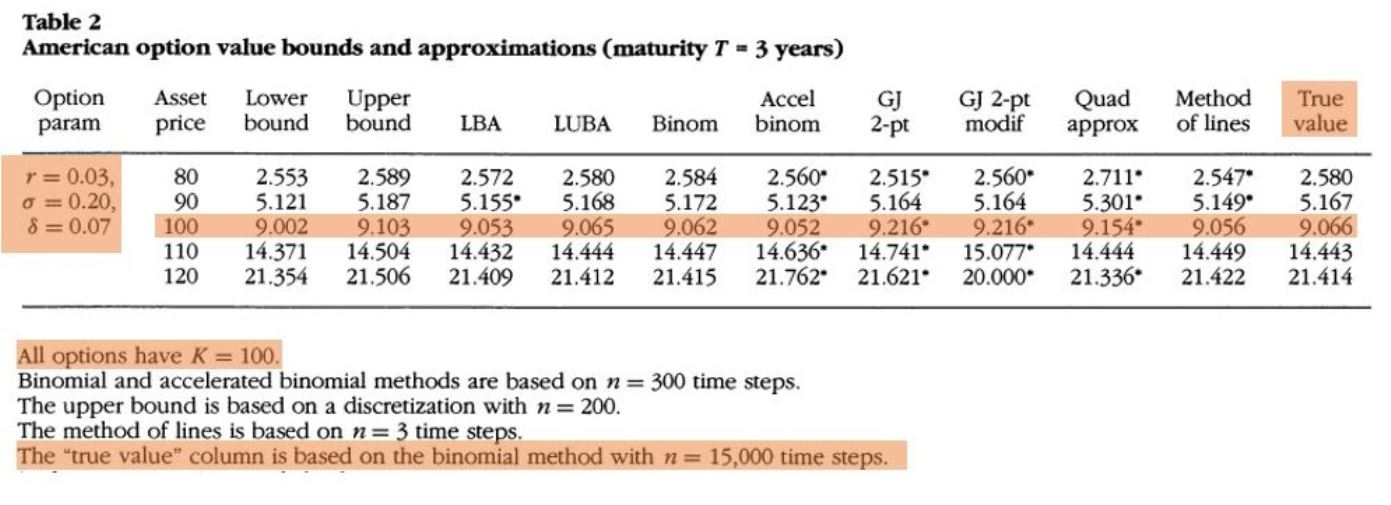

#Options on Options (Compound Options) set up with **Tian** (1993) Lattice using VBA
originally based on Haug p.303 that applied CRR:

https://www.amazon.com/Complete-Guide-Option-Pricing-Formulas/dp/0071389970

Adapted here to include Tian parameters. European and American estimates possible. The Tian and CRR model closely approximates Geske (1979).

https://bit.ly/3xWZOX9

Haug points out that options on options "compound options" can set up in the trinomial just as easily.

Option on Options include

Call on Call

Call on Put

Put on Call

Put on Put

Haugs Binomial tree permits American/European permutations. The European estimates converge accurately and quickly to Geske (1979). The Geske (1979) model is useful for implementing credit risk measurement.

Check here for explanation of Merton KMV credit risk modeling:
https://www.youtube.com/playlist?list=PLtlRowSvuTZQn78x205RcpDD7Rey7i0WW


The VBA code below is non executable in Colab. You need to set code up in Excel Visual Basic Editor.

In [ ]:
' Tian binomial tree
Public Function TianBinomialCompoundOption(CompoundEurAmeFlag As String, AmeEurFlag As String, CompoundTypeFlag As String, S As Double, X1 As Double, X2 As Double, t1 As Double, T2 As Double, _
r As Double, b As Double, v As Double, n As Integer) As Variant


    Dim OptionValue() As Double, ReturnValue(3) As Double
    Dim u As Double, d As Double, p As Double
    Dim dt As Double, Df As Double
    Dim i As Integer, j As Integer, z As Integer, y As Integer, w As Integer

    ReDim OptionValue(0 To n + 1)

    If CompoundTypeFlag = "cc" Or CompoundTypeFlag = "pc" Then
        z = 1
    Else
        z = -1
    End If


    If CompoundTypeFlag = "cc" Or CompoundTypeFlag = "cp" Then
        y = 1
    Else
        y = -1
    End If

    w = 1
    dt = T2 / n
    'u = Exp(v * Sqr(dt))
    'd = 1 / u
    'p = (Exp(b * dt) - d) / (u - d)
    Df = Exp(-r * dt)

    h = Exp(v ^ (2) * dt)
    u = 0.5 * Exp(b * dt) * h * (h + 1 + Sqr(h ^ (2) + 2 * h - 3))
    d = 0.5 * Exp(b * dt) * h * (h + 1 - Sqr(h ^ (2) + 2 * h - 3))
    p = (Exp(b * dt) - d) / (u - d)


    For i = 0 To n
         OptionValue(i) = Application.Max(0, z * (S * u ^ i * d ^ (n - i) - X1))
    Next

    For j = n - 1 To 0 Step -1
        For i = 0 To j

            OptionValue(i) = (p * OptionValue(i + 1) + (1 - p) * OptionValue(i)) * Df

            If AmeEurFlag = "a" Then
                OptionValue(i) = Application.Max((z * (S * u ^ i * d ^ (j - i) - X1)), OptionValue(i))
            End If

            If t1 >= dt * j And w = 1 Then
                    OptionValue(i) = Application.Max(y * (OptionValue(i) - X2), 0)
                    If i = j Then
                        w = -1
                    End If
            End If
            If w = -1 And CompoundEurAmeFlag = "a" Then
                OptionValue(i) = Application.Max(y * (OptionValue(i) - X2), OptionValue(i))
            End If

        Next
      Next

      TianBinomialCompoundOption = OptionValue(0)

  End Function

#R Functions from Derivmkts R package for Geske (1979) Compound Option

Please use this portal for R

https://rdrr.io/cran/derivmkts/

Geske (1979) paper can be found here

https://bit.ly/2TrHPZN

In [ ]:
library(derivmkts)

s = 100
kuo = 100
kco = 10
v = .2
r = 0.05
t1 = 0.5
t2 = 1.0
d = 0

calloncall(s, kuo, kco, v, r, t1, t2, d, returnscritical = FALSE)
callonput(s, kuo, kco, v, r, t1, t2, d, returnscritical = FALSE)
putoncall(s, kuo, kco, v, r, t1, t2, d, returnscritical = FALSE)
putonput(s, kuo, kco, v, r, t1, t2, d, returnscritical = FALSE)

#R source code for Geske (1979) using the Derivmkts package

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


# Geske (1979) Derivmkts Source Code for Black Scholes
https://rdrr.io/cran/derivmkts/src/R/blksch.R


In [ ]:
%%R
#' @export
bscall <- function(s, k, v, r, tt, d) {
    callp <- s*exp(-d*tt)*.nd1(s, k, v, r, tt, d) -
        k*exp(-r*tt)*.nd2(s, k, v, r, tt, d)
    return(callp)
}

#' @export
bsput <- function(s, k, v, r, tt, d) {
    putp <- bscall(s, k, v, r, tt, d) + k*exp(-r*tt) -
        s*exp(-d*tt)
    return(putp)
}

#' @export
assetcall <- function(s, k, v, r, tt, d) {
    price <- s*exp(-d*tt)*pnorm(.d1(s, k, v, r, tt, d))
    return(price)
}

#' @export
cashcall <- function(s, k, v, r, tt, d) {
    price <- exp(-r*tt)*pnorm(.d2(s, k, v, r, tt, d))
    return(price)
}

#' @export
assetput <- function(s, k, v, r, tt, d) {
    price <- s*exp(-d*tt)*pnorm(-.d1(s, k, v, r, tt, d))
    return(price)
}

#' @export
cashput <- function(s, k, v, r, tt, d) {
    price <- exp(-r*tt)*pnorm(-.d2(s, k, v, r, tt, d))
    return(price)
}

.d1 <- function(s, k, v, r, tt, d)
    (log(s/k) + (r-d+v^2/2)*tt)/(v*sqrt(tt))

.d2 <- function(s, k, v, r, tt, d)
    .d1(s, k, v, r, tt, d) - v*tt^(0.5)

.nd1 <- function(s, k, v, r, tt, d)
    pnorm(.d1(s, k, v, r, tt, d))

.nd2 <- function(s, k, v, r, tt, d)
    pnorm(.d2(s, k, v, r, tt, d))


In [ ]:
%%R
install.packages("mnormt")
library(mnormt)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/mnormt_2.0.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 50606 bytes (49 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write t

#Geske (1979) Derivmkts Source code Compound Options
https://rdrr.io/cran/derivmkts/src/R/compound.R


In [ ]:
%%R

tol <- 1e07

#' @export
binormsdist <- function(x1, x2, rho) {
    pmnorm(c(x1, x2), varcov = matrix(c(1, rho, rho, 1), nrow=2))
}


#' @export
#' @inheritParams blksch
#'
optionsoncall <- function(s, kuo, kco, v, r, t1, t2, d) {
    SCritical <- bscallimps(s, kuo, v, r, t2 - t1, d, kco)
    a1 <- .d1(s, SCritical, v, r, t1, d)
    a2 <- a1 - v * t1 ^ 0.5
    d1 <- .d1(s, kuo, v, r, t2, d)
    d2 <- d1 - v * t2 ^ 0.5
    cc <- (s * exp(-d * t2) * binormsdist(a1, d1, (t1 / t2) ^ 0.5)
             - kuo * exp(-r * t2) * binormsdist(a2, d2, (t1 / t2) ^ 0.5)
        - kco * exp(-r * t1) * pnorm(a2))
    pc <- cc - bscall(s, kuo, v, r, t2, d) + kco*exp(-r*t1)
    return(c(calloncall=cc, putoncall=pc, scritical=SCritical))
}

#' @export
#' @inheritParams blksch
#'
optionsonput <- function(s, kuo, kco, v, r, t1, t2, d) {
    SCritical <- bsputimps(s, kuo, v, r, t2 - t1, d, kco)
    a1 <- .d1(s, SCritical, v, r, t1, d)
    a2 <- a1 - v * t1 ^ 0.5
    d1 <- .d1(s, kuo, v, r, t2, d)
    d2 <- d1 - v * t2 ^ 0.5
    cp <- (-s * exp(-d * t2) * binormsdist(-a1, -d1, (t1 / t2) ^ 0.5)
        + kuo * exp(-r * t2) * binormsdist(-a2, -d2, (t1 / t2) ^ 0.5)
        - kco * exp(-r * t1) * pnorm(-a2))
    pp <- cp - bsput(s, kuo, v, r, t2, d) + kco*exp(-r*t1)
    return(c(callonput=cp, putonput=pp, scritical=SCritical))
}

#' @export
calloncall <- function(s, kuo, kco, v, r, t1, t2, d,
                       returnscritical=FALSE) {
    SCritical <- bscallimps(s, kuo, v, r, t2 - t1, d, kco)
    a1 <- .d1(s, SCritical, v, r, t1, d)
    a2 <- a1 - v * t1 ^ 0.5
    d1 <- .d1(s, kuo, v, r, t2, d)
    d2 <- d1 - v * t2 ^ 0.5
    temp <- (s * exp(-d * t2) * binormsdist(a1, d1, (t1 / t2) ^ 0.5)
             - kuo * exp(-r * t2) * binormsdist(a2, d2, (t1 / t2) ^ 0.5)
             - kco * exp(-r * t1) * pnorm(a2))
    if (returnscritical)
        return(c(price=temp, scritical=SCritical))
    else return(c(price=temp))
}

#' @export
putoncall <- function(s, kuo, kco, v, r, t1, t2, d,
                       returnscritical=FALSE) {
    SCritical <- bscallimps(s, kuo, v, r, t2 - t1, d, kco)
    a1 <- .d1(s, SCritical, v, r, t1, d)
    a2 <- a1 - v * t1 ^ 0.5
    d1 <- .d1(s, kuo, v, r, t2, d)
    d2 <- d1 - v * t2 ^ 0.5
    temp <- (-s * exp(-d * t2) * binormsdist(-a1, d1, -(t1 / t2) ^ 0.5)
             + kuo * exp(-r * t2) * binormsdist(-a2, d2, -(t1 / t2) ^ 0.5)
             + kco * exp(-r * t1) * pnorm(-a2))
    if (returnscritical)
        return(c(price=temp, scritical=SCritical))
    else return(c(price=temp))
}

#' @export
callonput <- function(s, kuo, kco, v, r, t1, t2, d,
                       returnscritical=FALSE) {
    SCritical <- bsputimps(s, kuo, v, r, t2 - t1, d, kco)
    a1 <- .d1(s, SCritical, v, r, t1, d)
    a2 <- a1 - v * t1 ^ 0.5
    d1 <- .d1(s, kuo, v, r, t2, d)
    d2 <- d1 - v * t2 ^ 0.5
    temp <- (-s * exp(-d * t2) * binormsdist(-a1, -d1, (t1 / t2) ^ 0.5)
             + kuo * exp(-r * t2) * binormsdist(-a2, -d2, (t1 / t2) ^ 0.5)
             - kco * exp(-r * t1) * pnorm(-a2))
    if (returnscritical)
        return(c(price=temp, scritical=SCritical))
    else return(c(price=temp))
}

#' @export
putonput <- function(s, kuo, kco, v, r, t1, t2, d,
                       returnscritical=FALSE) {
    SCritical <- bsputimps(s, kuo, v, r, t2 - t1, d, kco)
    a1 <- .d1(s, SCritical, v, r, t1, d)
    a2 <- a1 - v * t1 ^ 0.5
    d1 <- .d1(s, kuo, v, r, t2, d)
    d2 <- d1 - v * t2 ^ 0.5
    temp <- (s * exp(-d * t2) * binormsdist(a1, -d1, -(t1 / t2) ^ 0.5)
             - kuo * exp(-r * t2) * binormsdist(a2, -d2, -(t1 / t2) ^ 0.5)
             + kco * exp(-r * t1) * pnorm(a2))
    if (returnscritical)
        return(c(price=temp, scritical=SCritical))
    else return(c(price=temp))
}

#Geske (1979) Derivmkts Source Code for Implied Volatility
https://rdrr.io/cran/derivmkts/src/R/implied.R


In [ ]:
%%R
.tol <- .Machine$double.eps^0.5

#' @export
bscallimpvol <- function(s, k, r, tt, d, price) {
    ## this function is not vectorized
    if (price <= s*exp(-d*tt)-k*exp(-r*tt)) {
        print("Option price violates minimum bound")
    } else if (price > s*exp(-d*tt)) {
        print("Option price violates maximum bound")
    } else {
        f <- function(v, s, k, r, tt, d, price) {
            return(bscall(s, k, v, r, tt, d) - price)
        }
        x <- uniroot(f, c(0.001,1000), s, k, r, tt, d, price, tol=.tol)
        return(x$root)
    }
}

## add tolerance!
#' @export
bsputimpvol <- function(s, k, r, tt, d, price) {
    ## this function is not vectorized
    x <- bscallimpvol(s, k, r, tt, d,
                      price + s*exp(-d*tt) - k*exp(-r*tt))
    return(x)
}

#' @export
bscallimps <- function(s, k, v, r, tt, d, price) {
    f <- function(s, k, v, r, tt, d, price) {
        return(bscall(s, k, v, r, tt, d) - price)
    }
    x <- uniroot(f, c(0.001,10000), k, v, r, tt, d, price, tol=.tol)
    return(x$root)
}

#' @export
bsputimps <- function(s, k, v, r, tt, d, price) {
    f <- function(s, k, v, r, tt, d, price) {
        return(bsput(s, k, v, r, tt, d) - price)
    }
    x <- uniroot(f, c(0.001,10000), k, v, r, tt, d, price, tol=.tol)
    return(x$root)
}

In [ ]:
%%R
s = 100
kuo = 100
kco = 10
v = .2
r = 0.05
t1 = 0.5
t2 = 1.0
d = 0

calloncall(s, kuo, kco, v, r, t1, t2, d, returnscritical = FALSE)
callonput(s, kuo, kco, v, r, t1, t2, d, returnscritical = FALSE)
putoncall(s, kuo, kco, v, r, t1, t2, d, returnscritical = FALSE)
putonput(s, kuo, kco, v, r, t1, t2, d, returnscritical = FALSE)

   price 
5.191508 


In [ ]:
%%R
calloncall(s, kuo, kco, v, r, t1, t2, d, returnscritical = FALSE)

   price 
4.021452 


In [ ]:
%%R
callonput(s, kuo, kco, v, r, t1, t2, d, returnscritical = FALSE)

   price 
1.011935 


In [ ]:
%%R
putoncall(s, kuo, kco, v, r, t1, t2, d, returnscritical = FALSE)

   price 
3.323967 


In [ ]:
%%R
putonput(s, kuo, kco, v, r, t1, t2, d, returnscritical = FALSE)

   price 
5.191508 
